In [46]:
import nltk

In [47]:
#nltk.download('twitter_samples')

In [48]:
from nltk.corpus import twitter_samples

In [49]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [50]:
#print(positive_tweets)

In [51]:
#nltk.download('punkt')

In [52]:
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [53]:
print(tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [54]:
#nltk.download('wordnet') 

In [55]:
#nltk.download('averaged_perceptron_tagger')

In [56]:
import re, string
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
       # token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
       #               '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
       # token = re.sub("(@[A-Za-z0-9_]+)","", token)
        token = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', token) # remove URLs
        token = re.sub('@[^\s]+', '', token) # remove usernames
        token = re.sub(r'#([^\s]+)',r'', token) # remove the # in #hashtag

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [57]:
#nltk.download('stopwords')

In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['top', 'engage', 'member', 'community', 'week', ':)']


In [59]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [60]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', ':d']


In [61]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [62]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(50))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253), ('u', 245), ('day', 242), ('like', 229), ('see', 195), ('happy', 192), ("i'm", 183), ('great', 175), ('hi', 173), ('go', 167), ('back', 163), ('know', 161), ('new', 147), ('make', 145), (':p', 139), ('<3', 135), ('one', 131), ('..', 129), ('time', 125), ('hope', 123), ('us', 115), ('look', 114), ('today', 112), ('work', 109), ('friday', 100), ('nice', 99), ('please', 98), ('morning', 98), ('want', 96), ("i'll", 91), ('much', 89), ('think', 87), ('lot', 85), ('via', 85), ('would', 84), ('week', 83), ('well', 81), ('let', 81), ('really', 79), ('hey', 77), ('enjoy', 77)]


In [63]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [64]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [65]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2052.2 : 1.0
                      :) = True           Positi : Negati =    989.4 : 1.0
                     sad = True           Negati : Positi =     35.2 : 1.0
                    glad = True           Positi : Negati =     23.8 : 1.0
                followed = True           Negati : Positi =     23.5 : 1.0
                     bam = True           Positi : Negati =     21.8 : 1.0
                follower = True           Positi : Negati =     19.5 : 1.0
               community = True           Positi : Negati =     16.4 : 1.0
                     x15 = True           Negati : Positi =     15.6 : 1.0
                 welcome = True           Positi : Negati =     15.4 : 1.0
None


In [66]:
from nltk import classify
from sklearn.svm import LinearSVC

classifier2 = nltk.classify.SklearnClassifier(LinearSVC())
classifier2.train(train_data)


print("Accuracy is:", classify.accuracy(classifier2, test_data))

#print(classifier2.show_most_informative_features(10))

Accuracy is: 0.9956666666666667


In [67]:
custom_tweet = "Sun sets in east"

custom_tokens = remove_noise(custom_tweet)

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [79]:
# Methos 1:using getoldTweets3 library to fetch real time tweets

import GetOldTweets3 as got

In [80]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('coronavirus')\
                                               .setSince("2020-06-01")\
                                               .setUntil("2020-06-26")\
                                               .setLang('en')\
                                               .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets=[[tweet.text] for tweet in tweets]
    return text_tweets

In [81]:
text=""
text_tweets= get_tweets()
length=len(text_tweets)
NBResultLabels = []

for i in range(0,length):
    #text=text_tweets[i][0] + " " +text
    text=text_tweets[i][0]
    custom_tokens = remove_noise(word_tokenize(text))
    NBResultLabels.append(classifier.classify(dict([token, True] for token in custom_tokens)))
    print(classifier.classify(dict([token, True] for token in custom_tokens)))
  

Positive
Negative
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Negative
Negative
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Negative
Positive
Negative
Negative


In [82]:
# get the majority vote
if NBResultLabels.count('Positive') > NBResultLabels.count('Negative'):
    print("Overall Positive Sentiment")
    print("Positive Sentiment Percentage = " + str(100*NBResultLabels.count('Positive')/len(NBResultLabels)) + "%")
else: 
    print("Overall Negative Sentiment")
    print("Negative Sentiment Percentage = " + str(100*NBResultLabels.count('Negative')/len(NBResultLabels)) + "%")


Overall Negative Sentiment
Negative Sentiment Percentage = 58.0%


In [85]:
#Methos 2: twitter official API code

import twitter

In [86]:

# initialize api instance
twitter_api = twitter.Api(consumer_key='PbUZzsHqlify8uzjKGEvy3Oq4',
                        consumer_secret='Sh4LPOgZ2ZdAjwqrheEm0XDfh2w7s3Q8V2Kd1kOmPrNUavcUHy',
                        access_token_key='851505032365129729-cjunYHJyw9WShAyyK8FvSUkCqU8e3vs',
                        access_token_secret='yweuRyjxZ2erirpDjc3z1bYaOJ37X8fG1Fn7U8kJ6kAlx')

# test authentication
print(twitter_api.VerifyCredentials())

{"created_at": "Mon Apr 10 18:39:54 +0000 2017", "default_profile": true, "default_profile_image": true, "friends_count": 3, "id": 851505032365129729, "id_str": "851505032365129729", "name": "nikhil agarwal", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "ambivert_guy"}


In [87]:
def buildTestSet(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count = 100, lang='en')
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        
        return [[status.text] for status in tweets_fetched]
    except:
        print("Unfortunately, something went wrong..")
        return None

In [88]:
search_term = input("Enter a search keyword:")
testDataSet = buildTestSet(search_term)

print(testDataSet[0:4])

Enter a search keyword:coronavirus
Fetched 100 tweets for the term coronavirus
[['I will repeat this until it is understood.\n\nShutting down our country again &amp; again until the coronavirus disappear… https://t.co/OIGGGotyCg'], ['I’m running for Congress against Adam Schiff in November. \n\nWhile the coronavirus was spreading, Schiff was focused… https://t.co/K6GAhWGk2Z'], ["The current occupant of the WH wants to talk about schools and threats.  Instead, here is today's reminder that DON… https://t.co/SaIEFsoTBe"], ['RT @funder: BREAKING: The number of Americans dying of coronavirus started to rise again. Trump has failed us all.']]


In [89]:
text=""
length=len(testDataSet)
NBResultLabels = []

for i in range(0,length):
    ALL_text=text_tweets[i][0] + " " +text
    text=testDataSet[i][0]
    custom_tokens = remove_noise(word_tokenize(text))
    NBResultLabels.append(classifier.classify(dict([token, True] for token in custom_tokens)))
    print(classifier.classify(dict([token, True] for token in custom_tokens)))
  

Positive
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Positive


In [90]:
# get the majority vote
if NBResultLabels.count('Positive') > NBResultLabels.count('Negative'):
    print("Overall Positive Sentiment")
    print("Positive Sentiment Percentage = " + str(100*NBResultLabels.count('Positive')/len(NBResultLabels)) + "%")
else: 
    print("Overall Negative Sentiment")
    print("Negative Sentiment Percentage = " + str(100*NBResultLabels.count('Negative')/len(NBResultLabels)) + "%")


Overall Positive Sentiment
Positive Sentiment Percentage = 54.0%


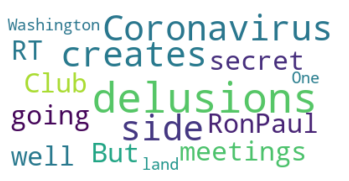

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(ALL_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()